## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview

combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mice_number = combined_mouse_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_data = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice_data

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_frame = pd.DataFrame(duplicate_mice_data)
duplicate_mice_frame

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_df = combined_mouse_df.loc[combined_mouse_df['Mouse ID'].isin(duplicate_mice_data)==False]

In [6]:
# Checking the number of mice in the clean DataFrame

clean_df_mouse_number = clean_mouse_df['Mouse ID'].nunique()
clean_df_mouse_number

248

In [7]:
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drugs_mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drugs_median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drugs_variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drugs_standarddeviation = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drugs_sem = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drugs_table = pd.DataFrame({"Mean": drugs_mean, "Median": drugs_median, "Variance": drugs_variance, "STD": drugs_standarddeviation, "SEM": drugs_sem})
drugs_table

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mouse Count')

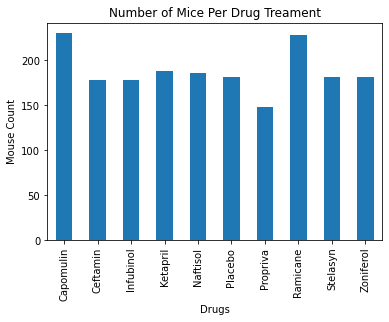

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_treatment_count = clean_mouse_df.groupby("Drug Regimen")["Mouse ID"].count()

pandas_plot = mice_treatment_count.plot.bar()

plt.title("Number of Mice Per Drug Treament")
plt.xlabel("Drugs")
plt.ylabel("Mouse Count")

Text(0, 0.5, 'Mouse Count')

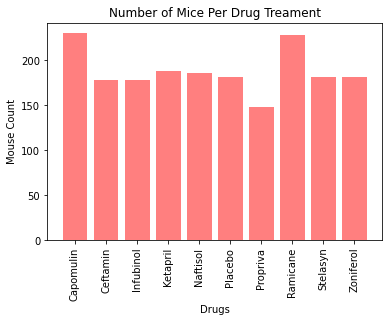

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mice_treatment_count))
plt.bar(x_axis, mice_treatment_count, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = 'vertical')

plt.title("Number of Mice Per Drug Treament")
plt.xlabel("Drugs")
plt.ylabel("Mouse Count")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mouse_Gender_df = clean_mouse_df.groupby(["Sex"]).count()
Mouse_Gender_df

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [13]:
female_mouse_count = Mouse_Gender_df.loc["Female", "Mouse ID"].sum()
female_mouse_count

922

In [14]:
male_mouse_count = Mouse_Gender_df.loc["Male", "Mouse ID"].sum()
male_mouse_count

958

In [15]:
total_mouse_count = female_mouse_count+male_mouse_count
total_mouse_count

1880

In [16]:
male_mouse_percentage = (male_mouse_count/total_mouse_count)*100
male_mouse_percentage

50.95744680851064

In [17]:
female_mouse_percentage = (female_mouse_count/total_mouse_count)*100
female_mouse_percentage

49.04255319148936

In [18]:
mouse_percentage_df = pd.DataFrame({"Male/Female": [male_mouse_percentage, female_mouse_percentage]})
mouse_percentage_df

,Male/Female
0,50.957447
1,49.042553


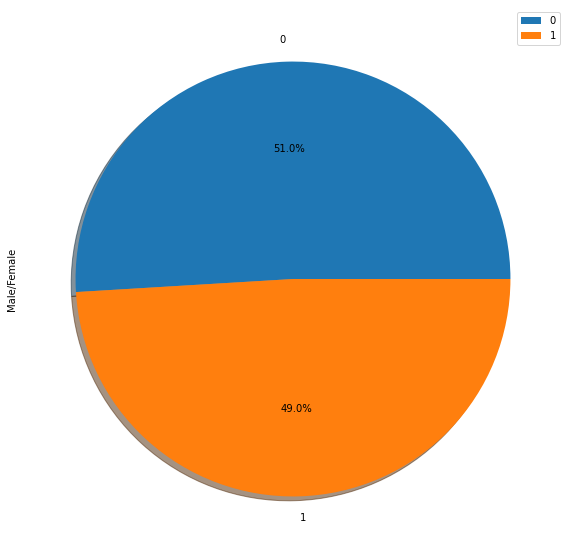

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_plot = mouse_percentage_df.plot.pie(y='Male/Female',figsize=(15,10), shadow = True, autopct="%1.1f%%")

plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

values = [male_mouse_percentage, female_mouse_percentage]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(values, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.ylabel('Sex',fontsize = 14)

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

clean_mouse_df.groupby(["Drug Regimen"]).count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [46]:
#Group by relevant treatments
capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
ramicane = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane",:]
infubinol = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol",:]
ceftamin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin",:]

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [23]:
capomulin_timepoint = capomulin.groupby('Mouse ID')['Timepoint'].max()
capomulin_tvol = pd.DataFrame(capomulin_timepoint)
capomulin_merged = pd.merge(capomulin_tvol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [27]:
capomulin_tumor_data = capomulin_merged["Tumor Volume (mm3)"]

quartiles = capomulin_tumor_data.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile-lower_quartile

lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)

print(f"The lower quartile of Capomulin tumors: {lower_quartile}")
print(f"The upper quartile of Capomulin tumors: {upper_quartile}")
print(f"The interquartile range of Capomulin tumors: {inter_quartile_range}")


print(f"Values below {lower_bound} are likley to be outliers.")
print(f"Values above {upper_bound} are likley to be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
Values below 20.70456164999999 are likley to be outliers.
Values above 51.83201549 are likley to be outliers.


In [25]:
ramicane_timepoint = ramicane.groupby('Mouse ID')['Timepoint'].max()
ramicane_tvol = pd.DataFrame(ramicane_timepoint)
ramicane_merged = pd.merge(ramicane_tvol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [28]:
ramicane_tumor_data = ramicane_merged["Tumor Volume (mm3)"]

quartiles = capomulin_tumor_data.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile-lower_quartile

lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)

print(f"The lower quartile of Ramicane tumors: {lower_quartile}")
print(f"The upper quartile of Ramicane tumors: {upper_quartile}")
print(f"The interquartile range of Ramicane tumors: {inter_quartile_range}")


print(f"Values below {lower_bound} are likley to be outliers.")
print(f"Values above {upper_bound} are likley to be outliers.")

The lower quartile of Ramicane tumors: 32.37735684
The upper quartile of Ramicane tumors: 40.1592203
The interquartile range of Ramicane tumors: 7.781863460000004
Values below 20.70456164999999 are likley to be outliers.
Values above 51.83201549 are likley to be outliers.


In [47]:
infubinol_timepoint = infubinol.groupby('Mouse ID')['Timepoint'].max()
infubinol_tvol = pd.DataFrame(infubinol_timepoint)
infubinol_merged = pd.merge(infubinol_tvol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [48]:
infubinol_tumor_data = infubinol_merged["Tumor Volume (mm3)"]

quartiles = capomulin_tumor_data.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile-lower_quartile

lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)

print(f"The lower quartile of Infubinol tumors: {lower_quartile}")
print(f"The upper quartile of Infubinol tumors: {upper_quartile}")
print(f"The interquartile range of Infubinol tumors: {inter_quartile_range}")


print(f"Values below {lower_bound} are likley to be outliers.")
print(f"Values above {upper_bound} are likley to be outliers.")

The lower quartile of Infubinol tumors: 32.37735684
The upper quartile of Infubinol tumors: 40.1592203
The interquartile range of Infubinol tumors: 7.781863460000004
Values below 20.70456164999999 are likley to be outliers.
Values above 51.83201549 are likley to be outliers.


In [33]:
ceftamin_timepoint = ceftamin.groupby('Mouse ID')['Timepoint'].max()
ceftamin_tvol = pd.DataFrame(ceftamin_timepoint)
ceftamin_merged = pd.merge(ceftamin_tvol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [34]:
ceftamin_tumor_data = ceftamin_merged["Tumor Volume (mm3)"]

quartiles = capomulin_tumor_data.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile-lower_quartile

lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)

print(f"The lower quartile of Ceftamin tumors: {lower_quartile}")
print(f"The upper quartile of Ceftamin tumors: {upper_quartile}")
print(f"The interquartile range of Ceftamin tumors: {inter_quartile_range}")


print(f"Values below {lower_bound} are likley to be outliers.")
print(f"Values above {upper_bound} are likley to be outliers.")

The lower quartile of Ceftamin tumors: 32.37735684
The upper quartile of Ceftamin tumors: 40.1592203
The interquartile range of Ceftamin tumors: 7.781863460000004
Values below 20.70456164999999 are likley to be outliers.
Values above 51.83201549 are likley to be outliers.


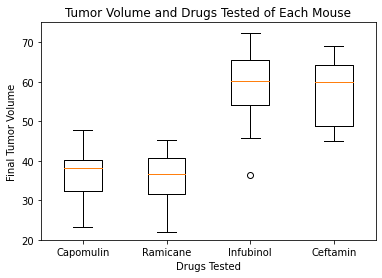

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_box_plot = [capomulin_tumor_data, ramicane_tumor_data, infubinol_tumor_data, ceftamin_tumor_data]
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume and Drugs Tested of Each Mouse')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drugs Tested')
ax1.boxplot(drug_box_plot, labels = Drug_Regimen)

plt.ylim(20, 75)

plt.show()

## Line and Scatter Plots

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

b128_mouse_df = capomulin.loc[capomulin["Mouse ID"] == "b128",:]
b128_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


Text(0, 0.5, 'Tumor Volume (mm3)')

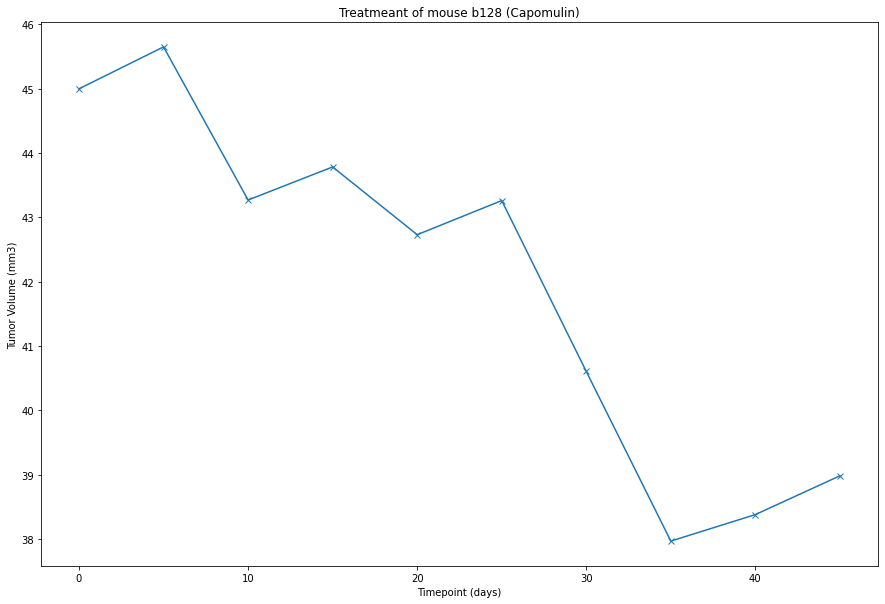

In [42]:
timepoint = b128_mouse_df["Timepoint"]
tumor = b128_mouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Treatmeant of mouse b128 (Capomulin)')
plt.plot(timepoint, tumor, marker = "x")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

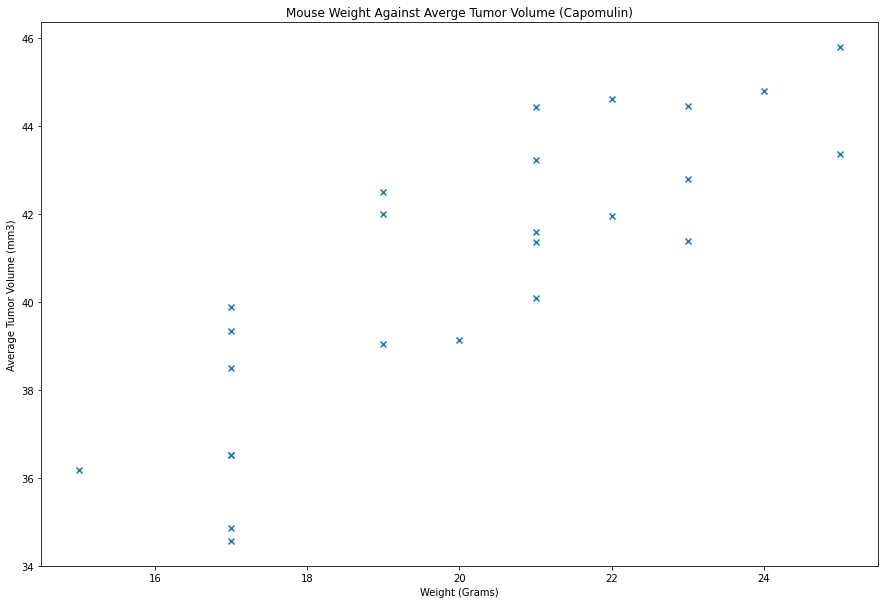

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
average_vol_capomulin = capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(average_vol_capomulin['Weight (g)'],average_vol_capomulin['Tumor Volume (mm3)'], marker = "x")
plt.title('Mouse Weight Against Averge Tumor Volume (Capomulin)')
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

correlation = (st.pearsonr(average_vol_capomulin['Weight (g)'], average_vol_capomulin['Tumor Volume (mm3)'])[0])
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.8419363424694717


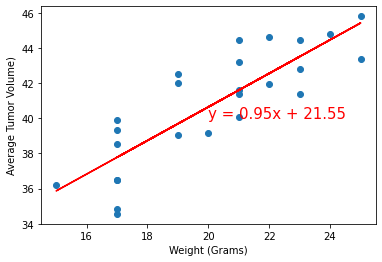

In [45]:
x_values = average_vol_capomulin['Weight (g)']
y_values = average_vol_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()